In [ ]:
# ! pip install yfinance

In [64]:
#  라이브러리 로드
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import yfinance as yf

In [65]:
ticker = "005930.KS"
data = yf.download(ticker, start='2010-01-01', end='2025-06-30', interval = '1d', auto_adjust=False)
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,,
2010-01-04,12051.839844,16180.0,16180.0,16000.0,16060.0,11950800
2010-01-05,12245.499023,16440.0,16580.0,16300.0,16520.0,27925850
2010-01-06,12528.544922,16820.0,16820.0,16520.0,16580.0,22948850
2010-01-07,12111.428711,16260.0,16820.0,16260.0,16820.0,22107950
2010-01-08,12230.602539,16420.0,16420.0,16120.0,16400.0,14777550
...,...,...,...,...,...,...
2025-06-23,58000.000000,58000.0,58500.0,57600.0,58400.0,16551694
2025-06-24,60500.000000,60500.0,60600.0,59300.0,59400.0,23737899


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3811 entries, 2010-01-04 to 2025-06-27
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, 005930.KS)  3811 non-null   float64
 1   (Close, 005930.KS)      3811 non-null   float64
 2   (High, 005930.KS)       3811 non-null   float64
 3   (Low, 005930.KS)        3811 non-null   float64
 4   (Open, 005930.KS)       3811 non-null   float64
 5   (Volume, 005930.KS)     3811 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 208.4 KB


In [67]:
data.to_csv('data/005930.KS01.csv')

# Date 부분 이전까지는 삭제하고 그 바로 이어서 Adj Close,Close,High,Low,Open,Volume  작성하고 저장.

In [68]:
df = pd.read_csv('data/005930.KS01.CSV')
print(df.info())
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3811 non-null   object 
 1   Adj Close  3811 non-null   float64
 2   Close      3811 non-null   float64
 3   High       3811 non-null   float64
 4   Low        3811 non-null   float64
 5   Open       3811 non-null   float64
 6   Volume     3811 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 208.5+ KB
None


,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,12051.839844,16180.0,16180.0,16000.0,16060.0,11950800
1,2010-01-05,12245.499023,16440.0,16580.0,16300.0,16520.0,27925850
2,2010-01-06,12528.544922,16820.0,16820.0,16520.0,16580.0,22948850
3,2010-01-07,12111.428711,16260.0,16820.0,16260.0,16820.0,22107950
4,2010-01-08,12230.602539,16420.0,16420.0,16120.0,16400.0,14777550
...,...,...,...,...,...,...,...
3806,2025-06-23,58000.000000,58000.0,58500.0,57600.0,58400.0,16551694
3807,2025-06-24,60500.000000,60500.0,60600.0,59300.0,59400.0,23737899
3808,2025-06-25,61300.000000,61300.0,61600.0,60300.0,61500.0,23933612
3809,2025-06-26,60200.000000,60200.0,61300.0,59900.0,61300.0,19402300


In [69]:
# date 부분을 인덱스로 설정하고, Date를 datetime으로 변환
df1 = df.set_index(pd.to_datetime(df.Date))
df1

,Date,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2010-01-04,2010-01-04,12051.839844,16180.0,16180.0,16000.0,16060.0,11950800
2010-01-05,2010-01-05,12245.499023,16440.0,16580.0,16300.0,16520.0,27925850
2010-01-06,2010-01-06,12528.544922,16820.0,16820.0,16520.0,16580.0,22948850
2010-01-07,2010-01-07,12111.428711,16260.0,16820.0,16260.0,16820.0,22107950
2010-01-08,2010-01-08,12230.602539,16420.0,16420.0,16120.0,16400.0,14777550
...,...,...,...,...,...,...,...
2025-06-23,2025-06-23,58000.000000,58000.0,58500.0,57600.0,58400.0,16551694
2025-06-24,2025-06-24,60500.000000,60500.0,60600.0,59300.0,59400.0,23737899
2025-06-25,2025-06-25,61300.000000,61300.0,61600.0,60300.0,61500.0,23933612


In [70]:
# 데이터 순서 변경
df2 = df1[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]
df2

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,11950800,12051.839844
2010-01-05,16520.0,16580.0,16300.0,16440.0,27925850,12245.499023
2010-01-06,16580.0,16820.0,16520.0,16820.0,22948850,12528.544922
2010-01-07,16820.0,16820.0,16260.0,16260.0,22107950,12111.428711
2010-01-08,16400.0,16420.0,16120.0,16420.0,14777550,12230.602539
...,...,...,...,...,...,...
2025-06-23,58400.0,58500.0,57600.0,58000.0,16551694,58000.000000
2025-06-24,59400.0,60600.0,59300.0,60500.0,23737899,60500.000000
2025-06-25,61500.0,61600.0,60300.0,61300.0,23933612,61300.000000


In [71]:
# 결측치 확인
df2.isnull().sum()
df2.loc[df2['Volume']==0]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-14,22800.0,22800.0,22800.0,22800.0,0,17824.919922
2017-09-26,53620.0,53620.0,53620.0,53620.0,0,43558.218750
2018-04-30,53000.0,53000.0,53000.0,53000.0,0,43879.062500
2018-05-02,53000.0,53000.0,53000.0,53000.0,0,43879.062500
2018-05-03,53000.0,53000.0,53000.0,53000.0,0,43879.062500
2020-03-09,56500.0,56500.0,56500.0,56500.0,0,49343.726562
2020-03-12,52100.0,52100.0,52100.0,52100.0,0,45501.035156
2022-01-26,74000.0,74000.0,74000.0,74000.0,0,68837.085938
2022-02-08,73000.0,73000.0,73000.0,73000.0,0,67906.875000


In [72]:
df2['Volume']=df2['Volume'].replace(0,np.nan)

C:\Users\admin\AppData\Local\Temp\ipykernel_15812\427378946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Volume']=df2['Volume'].replace(0,np.nan)


In [73]:
df2 = df2.dropna()
df2.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

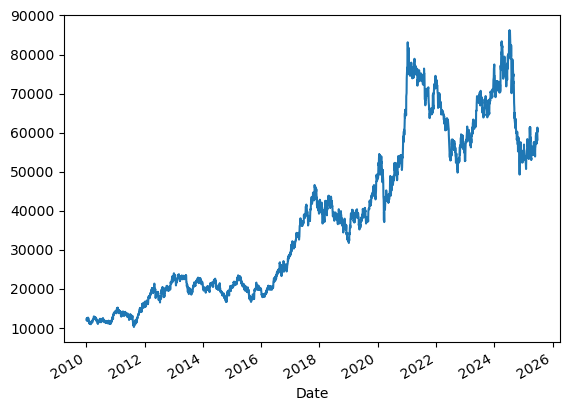

In [74]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
pig = df2['Adj Close'].plot()

In [75]:
df2

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,11950800.0,12051.839844
2010-01-05,16520.0,16580.0,16300.0,16440.0,27925850.0,12245.499023
2010-01-06,16580.0,16820.0,16520.0,16820.0,22948850.0,12528.544922
2010-01-07,16820.0,16820.0,16260.0,16260.0,22107950.0,12111.428711
2010-01-08,16400.0,16420.0,16120.0,16420.0,14777550.0,12230.602539
...,...,...,...,...,...,...
2025-06-23,58400.0,58500.0,57600.0,58000.0,16551694.0,58000.000000
2025-06-24,59400.0,60600.0,59300.0,60500.0,23737899.0,60500.000000
2025-06-25,61500.0,61600.0,60300.0,61300.0,23933612.0,61300.000000


In [76]:
# Adj CLose를 삭제(Adj를 예측해보기 위해)
X = df2.drop('Adj Close', axis=1)
# DataFrame 형태로 만들어주려고 [] 하나 더 써줌
Y = df2[['Adj Close']]
print(X.shape, type(X))
print(Y.shape, type(Y))

(3793, 5) <class 'pandas.core.frame.DataFrame'>
(3793, 1) <class 'pandas.core.frame.DataFrame'>


In [77]:
print(X)
print(Y)

               Open     High      Low    Close      Volume
Date                                                      
2010-01-04  16060.0  16180.0  16000.0  16180.0  11950800.0
2010-01-05  16520.0  16580.0  16300.0  16440.0  27925850.0
2010-01-06  16580.0  16820.0  16520.0  16820.0  22948850.0
2010-01-07  16820.0  16820.0  16260.0  16260.0  22107950.0
2010-01-08  16400.0  16420.0  16120.0  16420.0  14777550.0
...             ...      ...      ...      ...         ...
2025-06-23  58400.0  58500.0  57600.0  58000.0  16551694.0
2025-06-24  59400.0  60600.0  59300.0  60500.0  23737899.0
2025-06-25  61500.0  61600.0  60300.0  61300.0  23933612.0
2025-06-26  61300.0  61300.0  59900.0  60200.0  19402300.0
2025-06-27  60100.0  61600.0  60000.0  60800.0  17340470.0

[3793 rows x 5 columns]
               Adj Close
Date                    
2010-01-04  12051.839844
2010-01-05  12245.499023
2010-01-06  12528.544922
2010-01-07  12111.428711
2010-01-08  12230.602539
...                  ...
2025-06-

In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ms = MinMaxScaler() # 최솟값은 0 ~ 최댓값은 1로 값 조정 해줌
ss = StandardScaler() # 평균=0, 분산=1조절

# X.shape[0]는 행의 개수(3793개), X.shape[1]은 열의 개수(5개)
train_cnt = int(X.shape[0]*0.9)
text_cnt = int(X.shape[0]*0.1)
print(train_cnt, text_cnt)

X_ss = ss.fit_transform(X)
Y_ms = ms.fit_transform(Y)

print(X[:10])
print(X_ss[:10])
print(Y[:10])
print(Y_ms[:10])

x_train = X_ss[:train_cnt]
x_test = X_ss[train_cnt:]
y_train = Y_ms[:train_cnt]
y_test = Y_ms[train_cnt:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

3413 379
               Open     High      Low    Close      Volume
Date                                                      
2010-01-04  16060.0  16180.0  16000.0  16180.0  11950800.0
2010-01-05  16520.0  16580.0  16300.0  16440.0  27925850.0
2010-01-06  16580.0  16820.0  16520.0  16820.0  22948850.0
2010-01-07  16820.0  16820.0  16260.0  16260.0  22107950.0
2010-01-08  16400.0  16420.0  16120.0  16420.0  14777550.0
2010-01-11  16420.0  16460.0  15940.0  15940.0  19896100.0
2010-01-12  15940.0  16180.0  15900.0  16180.0  19218050.0
2010-01-13  16100.0  16120.0  15940.0  15940.0  13375300.0
2010-01-14  16120.0  16620.0  16000.0  16540.0  26551550.0
2010-01-15  16640.0  16860.0  16580.0  16840.0  19905600.0
[[-1.33440284 -1.33767965 -1.32853119 -1.32942339 -0.43405258]
 [-1.31195799 -1.31832036 -1.31376028 -1.31671914  1.67382639]
 [-1.3090304  -1.30670479 -1.30292827 -1.29815139  1.01712024]
 [-1.29732004 -1.30670479 -1.31572973 -1.32551439  0.906165  ]
 [-1.31781317 -1.32606408 -1.32

In [79]:
print(type(x_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [80]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [81]:
# np.array를 torch.Tensor로 바꿔줌
x_train_tensors = torch.Tensor(x_train)
x_test_tensors = torch.Tensor(x_test)
y_train_tensors = torch.Tensor(y_train)
y_test_tensors = torch.Tensor(y_test)


print(x_train_tensors.shape)
print(x_train_tensors.size(0), x_train_tensors.size(1) )

# tensor shape 변경 2차원(rows, colums) -> 3차원(rows, 1, columns) 
x_train_tensors_f = x_train_tensors.view(x_train_tensors.size(0), 1, x_train_tensors.size(1))
x_test_tensors_f = x_test_tensors.view(x_test_tensors.size(0), 1, x_test_tensors.size(1))

print(x_train_tensors_f.size(), y_train_tensors.size())
print(x_test_tensors_f.size(), y_test_tensors.size())

torch.Size([3413, 5])
3413 5
torch.Size([3413, 1, 5]) torch.Size([3413, 1])
torch.Size([380, 1, 5]) torch.Size([380, 1])


In [82]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes # 클래스의 개수
        self.input_size = input_size # 입력 데이터의 크기
        self.hidden_size = hidden_size # 은닉층의 크기
        self.num_layers = num_layers # LSTM 층의 개수
        self.seq_length = seq_length # 시퀀스의 길이
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 128) 
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU() 

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size) # 초기 은닉 상태
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size) # 초기 셀 상태
        # LSTM 레이어에 입력
        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn.view(-1, self.hidden_size) # 마지막 은닉 상태를 완전 연결층으로 펼침
        out = self.relu(hn)
        out = self.fc1(out) # 첫 번째 완전 연결층
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [83]:
num_epochs = 1000
learning_rate = 0.0001
input_size = 5 # 입력 데이터의 크기
hidden_size = 2 # 은닉층의 유닛 개수
num_layers = 1 # LSTM 층의 개수
num_classes = 1 # 예측할(출력할) 클래스의 개수 (Adj Close는 하나의 값이므로 1)

model = LSTM(num_classes, input_size, hidden_size, num_layers, x_train_tensors_f.shape[1])
criterion = nn.MSELoss() # 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # 최적화 함수


In [87]:
for epoch in range(num_epochs):
    outputs = model(x_train_tensors_f) # 모델에 입력
    optimizer.zero_grad() # 기울기 초기화
    loss = criterion(outputs, y_train_tensors) # 손실 계산
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    if (epoch) % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [0/1000], Loss: 0.0008
Epoch [100/1000], Loss: 0.0008
Epoch [200/1000], Loss: 0.0008
Epoch [300/1000], Loss: 0.0007
Epoch [400/1000], Loss: 0.0007
Epoch [500/1000], Loss: 0.0007
Epoch [600/1000], Loss: 0.0007
Epoch [700/1000], Loss: 0.0007
Epoch [800/1000], Loss: 0.0006
Epoch [900/1000], Loss: 0.0006


In [88]:
df_x_ss = ss.transform(X)
df_y_ms = ms.transform(Y)

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))

df_x_ss1 = df_x_ss.view(df_x_ss.size(0), 1, df_x_ss.size(1))
print(df_x_ss1.size(), df_x_ss.size())

torch.Size([3793, 1, 5]) torch.Size([3793, 5])


[[0.03118908]
 [0.0308232 ]
 [0.02790222]
 ...
 [0.60710967]
 [0.6092737 ]
 [0.61326385]]
[[12623.791]
 [12596.002]
 [12374.148]
 ...
 [56365.945]
 [56530.305]
 [56833.363]]


C:\Users\admin\AppData\Local\Temp\ipykernel_15812\2679630895.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['predicted'] = predicted
C:\Users\admin\AppData\Local\Temp\ipykernel_15812\2679630895.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Adj Close'] = labels_y


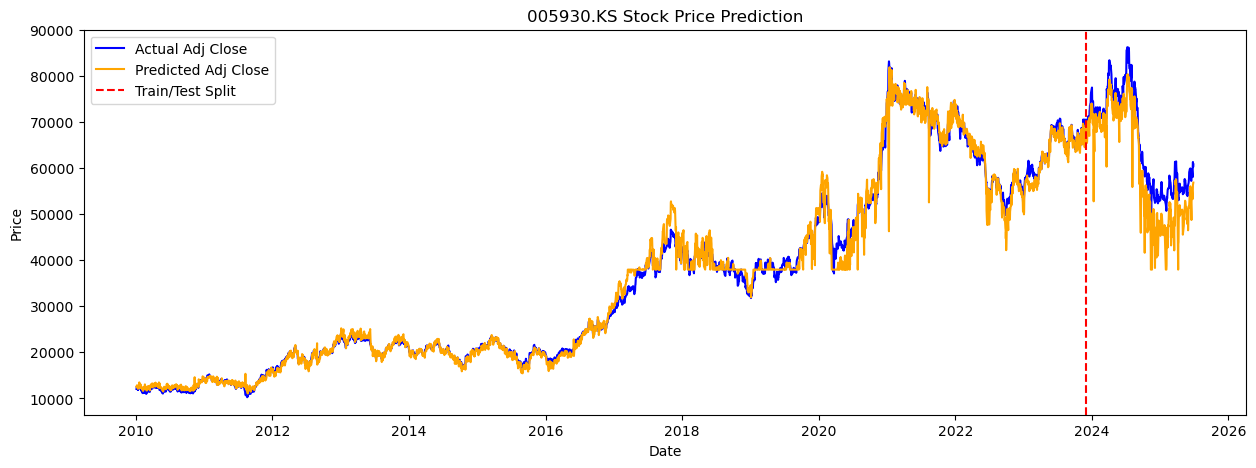

In [89]:
import datetime
predict = model(df_x_ss1)
# print(predict)
predicted = predict.data.numpy()
print(predicted)

# MinMaxScaler로 변환된 값을 원래 값으로 되돌림
predicted = ms.inverse_transform(predicted) 
labels_y = ms.inverse_transform(df_y_ms.data.numpy())
print(predicted)

df2['predicted'] = predicted
df2['Adj Close'] = labels_y

plt.figure(figsize=(15,5))
plt.plot(df2.index, df2['Adj Close'], label='Actual Adj Close', color='blue')
plt.plot(df2.index, df2['predicted'], label='Predicted Adj Close', color='orange')
plt.title(f'{ticker} Stock Price Prediction')

plt.axvline(x=datetime.datetime(2023, 12, 1), color='red', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [90]:
df2.iloc[3413]

Open         7.240000e+04
High         7.250000e+04
Low          7.170000e+04
Close        7.200000e+04
Volume       9.871284e+06
Adj Close    6.973089e+04
predicted    6.651738e+04
Name: 2023-12-01 00:00:00, dtype: float64

In [91]:
class GRU(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(GRU, self).__init__()

        self.num_classes = num_classes  # 클래스의 개수
        self.input_size = input_size
        self.hidden_size = hidden_size  # 은닉층의 크기
        self.num_layers = num_layers
        self.seq_length = seq_length  # 시퀀스의 길이
        
        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 128)  # 출력층
        self.fc2 = nn.Linear(128, num_classes)  # 최종 출력층
        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.gru.hidden_size)  # 초기 은닉 상태
        output, hn = self.gru(x, h_0)  # GRU 레이어에 입력
        out = self.relu(hn)
        out = self.fc1(out) # 첫 번째 완전 연결층
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [92]:
num_epochs = 5000
learning_rate = 0.0001

input_size = 5 # 입력 데이터의 크기
hidden_size = 2 # 은닉층의 유닛 개수
num_layers = 1 # GRU 층의 개수
num_classes = 1 # 예측할(출력할) 클래스의 개수 (Adj Close는 하나의 값이므로 1)

model = GRU(num_classes, input_size, hidden_size, num_layers, x_train_tensors_f.shape[1])
criterion = nn.MSELoss() # 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # 최적화 함수


In [93]:
for epoch in range(num_epochs):
    outputs = model(x_train_tensors_f) # 모델에 입력
    optimizer.zero_grad() # 기울기 초기화
    loss = criterion(outputs, y_train_tensors) # 손실 계산
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    if (epoch) % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():1.5f}')

c:\Users\admin\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([3413, 1])) that is different to the input size (torch.Size([1, 3413, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [0/5000], Loss: 0.18697
Epoch [100/5000], Loss: 0.06454
Epoch [200/5000], Loss: 0.03807
Epoch [300/5000], Loss: 0.02304
Epoch [400/5000], Loss: 0.01275
Epoch [500/5000], Loss: 0.00760
Epoch [600/5000], Loss: 0.00541
Epoch [700/5000], Loss: 0.00442
Epoch [800/5000], Loss: 0.00387
Epoch [900/5000], Loss: 0.00345
Epoch [1000/5000], Loss: 0.00310
Epoch [1100/5000], Loss: 0.00279
Epoch [1200/5000], Loss: 0.00252
Epoch [1300/5000], Loss: 0.00229
Epoch [1400/5000], Loss: 0.00208
Epoch [1500/5000], Loss: 0.00190
Epoch [1600/5000], Loss: 0.00173
Epoch [1700/5000], Loss: 0.00156
Epoch [1800/5000], Loss: 0.00137
Epoch [1900/5000], Loss: 0.00118
Epoch [2000/5000], Loss: 0.00099
Epoch [2100/5000], Loss: 0.00085
Epoch [2200/5000], Loss: 0.00073
Epoch [2300/5000], Loss: 0.00064
Epoch [2400/5000], Loss: 0.00056
Epoch [2500/5000], Loss: 0.00050
Epoch [2600/5000], Loss: 0.00045
Epoch [2700/5000], Loss: 0.00040
Epoch [2800/5000], Loss: 0.00037
Epoch [2900/5000], Loss: 0.00034
Epoch [3000/5000], Los

tensor([[0.0225],
        [0.0326],
        [0.0323],
        ...,
        [0.6108],
        [0.6065],
        [0.5934]], grad_fn=<SqueezeBackward1>)
[[11961.075]
 [12734.18 ]
 [12707.487]
 ...
 [56646.64 ]
 [56318.273]
 [55324.824]]


C:\Users\admin\AppData\Local\Temp\ipykernel_15812\2552773567.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['predicted'] = predicted
C:\Users\admin\AppData\Local\Temp\ipykernel_15812\2552773567.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Adj Close'] = labels_y


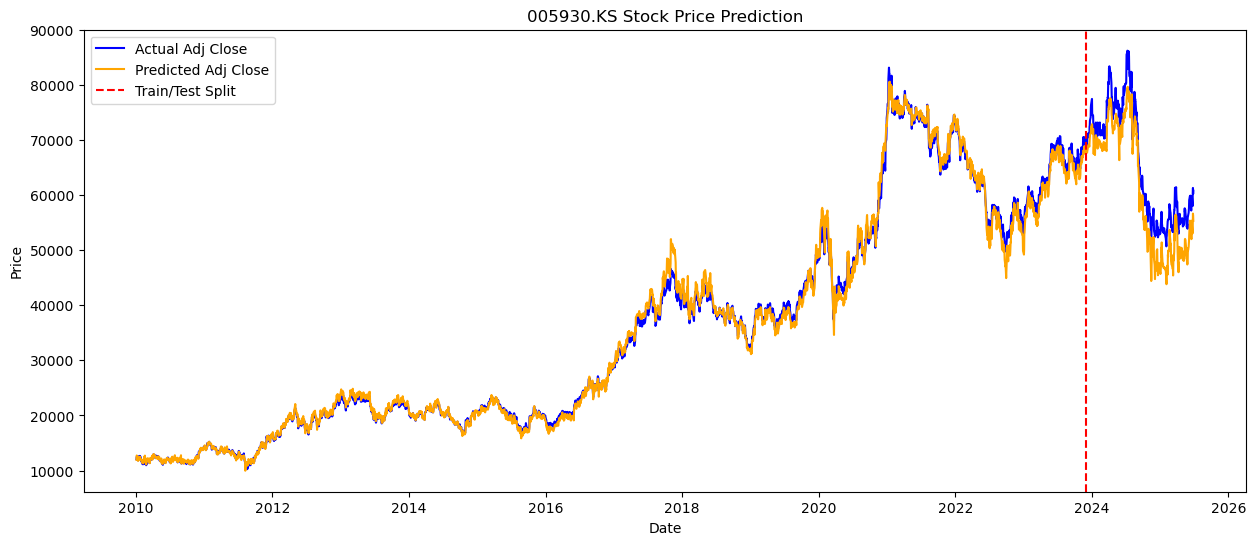

In [97]:
import datetime
predict = model(df_x_ss1).squeeze(0)  # squeeze()를 사용하여 차원 축소
print(predict)
predicted = predict.data.numpy()
# print(predicted)

label_y = df_y_ms.data.numpy()
# MinMaxScaler로 변환된 값을 원래 값으로 되돌림
predicted = ms.inverse_transform(predicted) 
labels_y = ms.inverse_transform(label_y)
print(predicted)

df2['predicted'] = predicted
df2['Adj Close'] = labels_y

plt.figure(figsize=(15,6))
plt.plot(df2.index, df2['Adj Close'], label='Actual Adj Close', color='blue')
plt.plot(df2.index, df2['predicted'], label='Predicted Adj Close', color='orange')
plt.title(f'{ticker} Stock Price Prediction')

plt.axvline(x=datetime.datetime(2023, 12, 1), color='red', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()